In [1]:
import pandas as pd
import numpy as np
import urllib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [2]:
attorneys = pd.read_csv("attorneys.csv") 
attorneys_time = pd.read_csv("attorneytimeentries.csv")
categories = pd.read_csv("categories.csv")
clients = pd.read_csv("clients.csv")
questionposts = pd.read_csv("questionposts.csv", on_bad_lines='skip')
questions = pd.read_csv("questions.csv")
statesites = pd.read_csv("statesites.csv")
subcategories = pd.read_csv("subcategories.csv")

/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/181733258.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  questionposts = pd.read_csv("questionposts.csv", on_bad_lines='skip')


In [3]:
attorneys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11544 entries, 0 to 11543
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           11544 non-null  int64 
 1   StateAbbr    11544 non-null  object
 2   AttorneyUno  11544 non-null  object
 3   City         11529 non-null  object
 4   County       11539 non-null  object
 5   StateName    11544 non-null  object
 6   PostalCode   11544 non-null  int64 
 7   CreatedUtc   11544 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.6+ KB


In [4]:
attorneys_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114613 entries, 0 to 114612
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            114613 non-null  int64  
 1   StateAbbr     114613 non-null  object 
 2   TimeEntryUno  114613 non-null  object 
 3   AttorneyUno   114613 non-null  object 
 4   Hours         114613 non-null  float64
 5   EnteredOnUtc  114613 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.2+ MB


In [5]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           430 non-null    int64 
 1   StateAbbr    430 non-null    object
 2   CategoryUno  430 non-null    object
 3   Category     430 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.6+ KB


In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331426 entries, 0 to 331425
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  331426 non-null  int64  
 1   StateAbbr           331426 non-null  object 
 2   ClientUno           331426 non-null  object 
 3   County              331180 non-null  object 
 4   StateName           331426 non-null  object 
 5   PostalCode          314157 non-null  float64
 6   EthnicIdentity      278298 non-null  object 
 7   Age                 279870 non-null  float64
 8   Gender              280227 non-null  object 
 9   MaritalStatus       279548 non-null  object 
 10  Veteran             269757 non-null  object 
 11  Imprisoned          280602 non-null  object 
 12  NumberInHousehold   280602 non-null  float64
 13  AnnualIncome        280565 non-null  float64
 14  AllowedIncome       280602 non-null  float64
 15  CheckingBalance     212020 non-nul

In [7]:
questionposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365195 entries, 0 to 365194
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Id           365195 non-null  object
 1   StateAbbr    364798 non-null  object
 2   QuestionUno  364766 non-null  object
 3   PostText     364515 non-null  object
 4   CreatedUtc   364763 non-null  object
dtypes: object(5)
memory usage: 13.9+ MB


In [8]:
posts_uno_text = questionposts[['QuestionUno', 'PostText']]

In [9]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202879 entries, 0 to 202878
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   202879 non-null  int64 
 1   StateAbbr            202879 non-null  object
 2   QuestionUno          202879 non-null  object
 3   CategoryUno          202879 non-null  object
 4   Category             202879 non-null  object
 5   SubcategoryUno       202879 non-null  object
 6   Subcategory          202879 non-null  object
 7   AskedByClientUno     202841 non-null  object
 8   AskedOnUtc           202879 non-null  object
 9   TakenByAttorneyUno   144005 non-null  object
 10  TakenOnUtc           145651 non-null  object
 11  ClosedByAttorneyUno  137787 non-null  object
 12  ClosedOnUtc          199085 non-null  object
 13  LegalDeadline        43944 non-null   object
dtypes: int64(1), object(13)
memory usage: 21.7+ MB


In [10]:
question_cat_uno = questions[['QuestionUno', 'Category']]

In [11]:
statesites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             42 non-null     int64  
 1   StateAbbr                      42 non-null     object 
 2   StateName                      42 non-null     object 
 3   AllowedAssets                  42 non-null     int64  
 4   BaseIncomeLimit                42 non-null     int64  
 5   PerHouseholdMemberIncomeLimit  42 non-null     int64  
 6   IncomeMultiplier               42 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.4+ KB


In [12]:
subcategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              966 non-null    int64 
 1   StateAbbr       966 non-null    object
 2   CategoryUno     966 non-null    object
 3   SubcategoryUno  966 non-null    object
 4   Subcategory     959 non-null    object
dtypes: int64(1), object(4)
memory usage: 37.9+ KB


## Exploratory Data Analysis

First, let us look at the frequency of various question categories

In [13]:
questions['Category'].value_counts()

Family and Children                  88753
Other                                37053
Housing and Homelessness             34755
Consumer Financial Questions         17273
Work, Employment and Unemployment    10187
Individual Rights                     8312
Health and Disability                 2707
Income Maintenance                    2688
Education                              794
Juvenile                               357
Name: Category, dtype: int64

In [14]:
questions['Subcategory'].value_counts()

Family/Divorce/Custody                 33369
Other                                  19632
Family/Divorce/Custody/Adoption        10969
Housing or Property Owned               8600
Debts & Purchases                       7363
                                       ...  
2019 Flood â€”Insurance                    1
Hurricane Florence - Lost Documents        1
COVID 19 - Healthcare                      1
Veterans â€“ VA Pension                    1
Guardianship/POA - COVID 19                1
Name: Subcategory, Length: 346, dtype: int64

In [15]:
clients_numhouse_income = clients[['NumberInHousehold', 'AnnualIncome']]
clients_numhouse_income = clients_numhouse_income.dropna()
clients_numhouse_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280565 entries, 0 to 331424
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NumberInHousehold  280565 non-null  float64
 1   AnnualIncome       280565 non-null  float64
dtypes: float64(2)
memory usage: 6.4 MB


In [16]:
merged_questions = pd.merge(posts_uno_text, question_cat_uno, on = "QuestionUno")

In [17]:
merged_questions.head()
family_children = merged_questions[merged_questions['Category'] == 'Family and Children']
family_children = family_children.dropna()
housing_homelessness = merged_questions[merged_questions['Category'] == 'Housing and Homelessness']
housing_homelessness = housing_homelessness.dropna()

In [18]:
questions_imp = questions[['CategoryUno', 'AskedByClientUno', 'AskedOnUtc', 'TakenByAttorneyUno', 'TakenOnUtc','ClosedByAttorneyUno', 'ClosedOnUtc', 'LegalDeadline']]
clients_imp = clients[['ClientUno', 'StateName', 'EthnicIdentity', 'Age', 'Gender', 'MaritalStatus', 'Veteran', 'Imprisoned', 'NumberInHousehold', 'AnnualIncome']]
categories_imp = categories[['CategoryUno', 'Category']]
statesites_imp = statesites[['StateName','BaseIncomeLimit','IncomeMultiplier']]
attorneys_imp = attorneys[['AttorneyUno', 'StateName']]

In [19]:
questions_imp.rename(columns = {'AskedByClientUno':'ClientUno'}, inplace = True)

/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/800720372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_imp.rename(columns = {'AskedByClientUno':'ClientUno'}, inplace = True)


In [20]:
questions_imp.head()

,CategoryUno,ClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
0,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00
1,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,NaN,NaN,2019-08-13 15:09:14,NaN
2,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NaN
3,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN
4,F6016FBD-9501-4448-BCD3-BBB0E834E33B,ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,NaN,NaN,2019-08-13 15:09:20,NaN


In [21]:
clients_questions  = pd.merge(questions_imp, clients_imp, on = 'ClientUno')

In [22]:
clients_questions.head()

,CategoryUno,ClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline,StateName,EthnicIdentity,Age,Gender,MaritalStatus,Veteran,Imprisoned,NumberInHousehold,AnnualIncome
0,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00,North Carolina,African American,26.0,Female,Single,No,No,3.0,0.0
1,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,NaN,NaN,2019-08-13 15:09:14,NaN,North Carolina,I'd rather not answer,41.0,Male,Divorced or Widowed,No,No,4.0,9240.0
2,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NaN,North Carolina,I'd rather not answer,41.0,Male,Divorced or Widowed,No,No,4.0,9240.0
3,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN,North Carolina,Asian,45.0,Female,Married / remarried,No,No,2.0,1600.0
4,F6016FBD-9501-4448-BCD3-BBB0E834E33B,ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,NaN,NaN,2019-08-13 15:09:20,NaN,North Carolina,African American,27.0,Female,Divorced or Widowed,No,No,2.0,12000.0


In [23]:
dropped_clients_questions = clients_questions.dropna(subset= ['AskedOnUtc', 'TakenOnUtc', 'ClosedOnUtc'])

In [24]:
dropped_clients_questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144827 entries, 2 to 202838
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CategoryUno          144827 non-null  object 
 1   ClientUno            144827 non-null  object 
 2   AskedOnUtc           144827 non-null  object 
 3   TakenByAttorneyUno   143186 non-null  object 
 4   TakenOnUtc           144827 non-null  object 
 5   ClosedByAttorneyUno  132533 non-null  object 
 6   ClosedOnUtc          144827 non-null  object 
 7   LegalDeadline        31016 non-null   object 
 8   StateName            144827 non-null  object 
 9   EthnicIdentity       123769 non-null  object 
 10  Age                  135270 non-null  float64
 11  Gender               124556 non-null  object 
 12  MaritalStatus        124240 non-null  object 
 13  Veteran              120155 non-null  object 
 14  Imprisoned           135733 non-null  object 
 15  NumberInHousehold

In [25]:
dropped_clients_questions['AskedOnUtc'] = pd.to_datetime(dropped_clients_questions['AskedOnUtc'])
dropped_clients_questions['TakenOnUtc'] = pd.to_datetime(dropped_clients_questions['TakenOnUtc'])
dropped_clients_questions['ClosedOnUtc'] = pd.to_datetime(dropped_clients_questions['ClosedOnUtc'])

/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/3826989939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_clients_questions['AskedOnUtc'] = pd.to_datetime(dropped_clients_questions['AskedOnUtc'])
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/3826989939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_clients_questions['TakenOnUtc'] = pd.to_datetime(dropped_clients_questions['TakenOnUtc'])
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_4

In [28]:
dropped_clients_questions['TakenTime'] = dropped_clients_questions['TakenOnUtc'] - dropped_clients_questions['AskedOnUtc']
dropped_clients_questions['ClosedTime'] = dropped_clients_questions['ClosedOnUtc'] - dropped_clients_questions['TakenOnUtc']

/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/6851245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_clients_questions['TakenTime'] = dropped_clients_questions['TakenOnUtc'] - dropped_clients_questions['AskedOnUtc']
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/6851245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_clients_questions['ClosedTime'] = dropped_clients_questions['ClosedOnUtc'] - dropped_clients_questions['TakenOnUtc']


In [45]:
clients_takentime = dropped_clients_questions[["Gender", "EthnicIdentity", "StateName", "TakenTime"]]

In [46]:
clients_takentime = clients_takentime.dropna()
clients_takentime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123295 entries, 2 to 202838
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   Gender          123295 non-null  object         
 1   EthnicIdentity  123295 non-null  object         
 2   StateName       123295 non-null  object         
 3   TakenTime       123295 non-null  timedelta64[ns]
dtypes: object(3), timedelta64[ns](1)
memory usage: 4.7+ MB


In [47]:
clients_takentime = clients_takentime[(clients_takentime['Gender'] == 'Male') | (clients_takentime['Gender'] == 'Female')]
clients_takentime['Gender'].value_counts()

Female    84285
Male      36218
Name: Gender, dtype: int64

In [62]:
gender_time = clients_takentime[['Gender','TakenTime']]

In [63]:
gender_time_sec = gender_time
gender_time_sec['TakenTime'] = gender_time_sec['TakenTime'].dt.total_seconds()
gender_time_sec['TakenTime'] = gender_time_sec['TakenTime'].astype('int64')
gender_time_sec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120503 entries, 2 to 202838
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Gender     120503 non-null  object
 1   TakenTime  120503 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/1485533126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_time_sec['TakenTime'] = gender_time_sec['TakenTime'].dt.total_seconds()
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/1485533126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_time_sec['TakenTime'] = gender_time_sec['TakenTime'].astype('int64')


In [64]:
avg_time = gender_time_sec.groupby(["Gender"]).mean().reset_index()

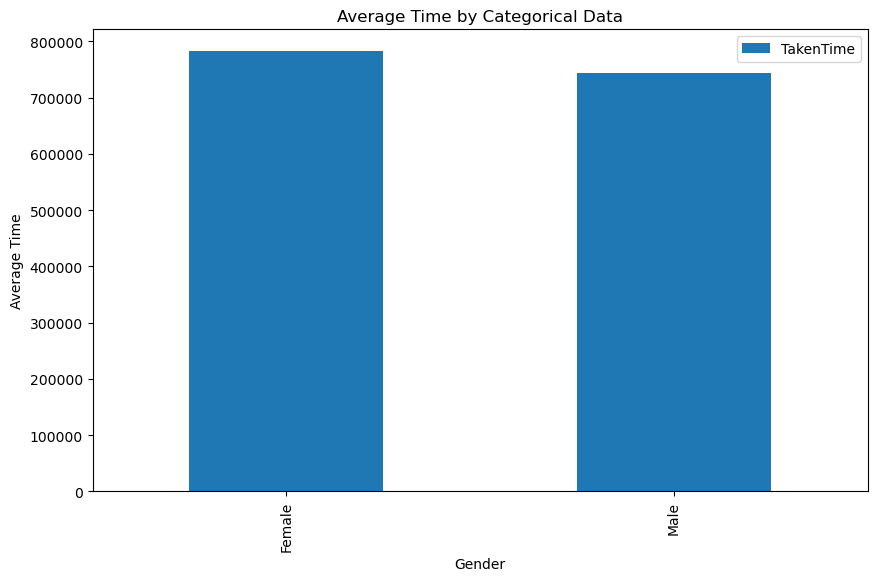

In [65]:
# Pivot the table to have categories as columns
pivot = pd.pivot_table(avg_time, index='Gender', values='TakenTime')

# Plot the pivot table
pivot.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Average Time')
plt.title('Average Time by Categorical Data')

# Show the plot
plt.show()

In [72]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [77]:
clients_takentime['EthnicIdentity'].value_counts().head(50)

Caucasian                                                                         63804
African American                                                                  14988
Latino or Hispanic                                                                 9159
Not Hispanic or Latino                                                             9112
I'd rather not answer                                                              6741
Other                                                                              2606
Caucasian,Other                                                                    2208
Asian                                                                              2038
Caucasian,Latino or Hispanic                                                       1484
Hispanic or Latino                                                                 1429
Native American or Alaska Native                                                   1015
Caucasian,Native American or Ala

In [78]:
veteran_time = dropped_clients_questions[['Veteran', 'TakenTime']]

In [80]:
veteran_time.dropna()

,Veteran,TakenTime
2,No,2 days 02:39:58
3,No,37 days 15:30:54
9,No,27 days 20:13:33
10,No,17 days 02:28:10
12,No,26 days 20:04:31
...,...,...
202828,No,25 days 08:58:56
202829,No,0 days 00:45:44
202832,No,23 days 07:27:07
202834,No,34 days 01:24:49


In [81]:
veteran_time_sec = veteran_time
veteran_time_sec['TakenTime'] = veteran_time_sec['TakenTime'].dt.total_seconds()
veteran_time_sec['TakenTime'] = veteran_time_sec['TakenTime'].astype('int64')

/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/2155012892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veteran_time_sec['TakenTime'] = veteran_time_sec['TakenTime'].dt.total_seconds()
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/2155012892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veteran_time_sec['TakenTime'] = veteran_time_sec['TakenTime'].astype('int64')


<Axes: xlabel='Veteran'>

Text(0.5, 0, 'Veteran')

Text(0, 0.5, 'Average Time')

Text(0.5, 1.0, 'Average Time by Categorical Data')

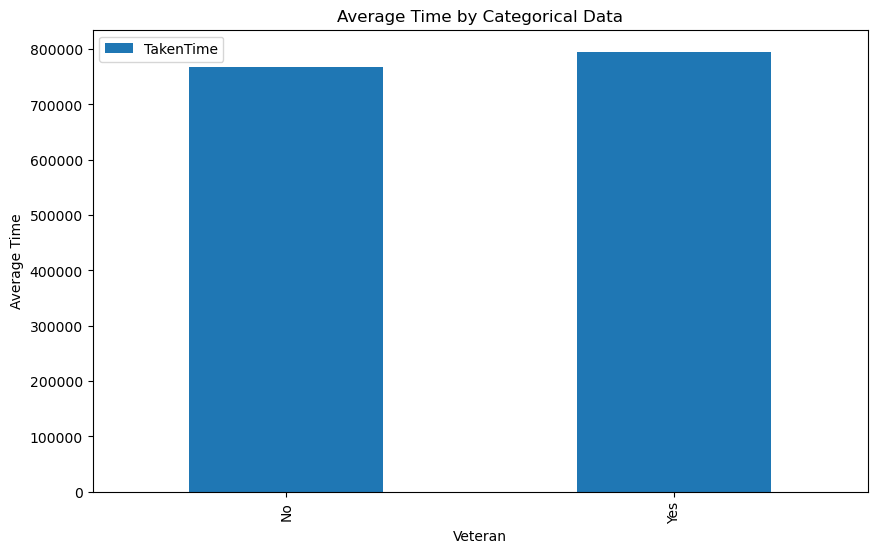

In [83]:
avg_veteran_time = veteran_time_sec.groupby(["Veteran"]).mean().reset_index()

# Pivot the table to have categories as columns
pivot = pd.pivot_table(avg_veteran_time, index='Veteran', values='TakenTime')

# Plot the pivot table
pivot.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Veteran')
plt.ylabel('Average Time')
plt.title('Average Time by Categorical Data')

# Show the plot
plt.show()

In [85]:
veteran_time['Veteran'].value_counts()

No     111727
Yes      8428
Name: Veteran, dtype: int64

In [86]:
category_questions = pd.merge(questions_imp, categories_imp, on = 'CategoryUno')
category_clients_questions = category_questions.dropna(subset= ['AskedOnUtc', 'TakenOnUtc', 'ClosedOnUtc'])
category_clients_questions['AskedOnUtc'] = pd.to_datetime(category_clients_questions['AskedOnUtc'])
category_clients_questions['TakenOnUtc'] = pd.to_datetime(category_clients_questions['TakenOnUtc'])
category_clients_questions['ClosedOnUtc'] = pd.to_datetime(category_clients_questions['ClosedOnUtc'])
category_clients_questions['TakenTime'] = category_clients_questions['TakenOnUtc'] - category_clients_questions['AskedOnUtc']
category_clients_questions['ClosedTime'] = category_clients_questions['ClosedOnUtc'] - category_clients_questions['TakenOnUtc']

/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/4184794080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_clients_questions['AskedOnUtc'] = pd.to_datetime(category_clients_questions['AskedOnUtc'])
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/4184794080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_clients_questions['TakenOnUtc'] = pd.to_datetime(category_clients_questions['TakenOnUtc'])
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykern

In [93]:
category_takentime = category_clients_questions[["Category", "TakenTime"]]
category_takentime = category_takentime.dropna()
category_time_sec = category_takentime
category_time_sec['TakenTime'] = category_time_sec['TakenTime'].dt.total_seconds()
category_time_sec['TakenTime'] = category_time_sec['TakenTime'].astype('int64')
category_time_sec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144850 entries, 1 to 202878
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Category   144850 non-null  object
 1   TakenTime  144850 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


<Axes: xlabel='Category'>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Average Time to Take Case')

Text(0.5, 1.0, 'Average Time by Category')

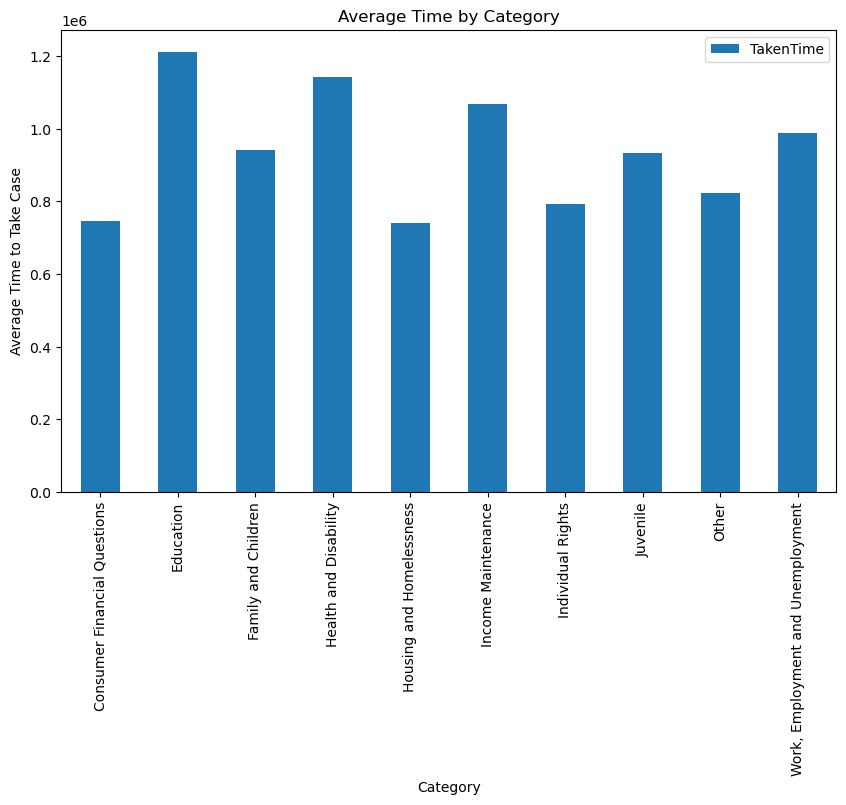

In [94]:
avg_category_time = category_time_sec.groupby(["Category"]).mean().reset_index()

# Pivot the table to have categories as columns
pivot = pd.pivot_table(avg_category_time, index='Category', values='TakenTime')

# Plot the pivot table
pivot.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Average Time to Take Case')
plt.title('Average Time by Category')

# Show the plot
plt.show()

In [95]:
category_takentime = category_clients_questions[["Category", "ClosedTime"]]
category_takentime = category_takentime.dropna()
category_time_sec = category_takentime
category_time_sec["ClosedTime"] = category_time_sec["ClosedTime"].dt.total_seconds()
category_time_sec["ClosedTime"] = category_time_sec["ClosedTime"].astype('int64')
category_time_sec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144850 entries, 1 to 202878
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Category    144850 non-null  object
 1   ClosedTime  144850 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


<Axes: xlabel='Category'>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Average Time to Close Case')

Text(0.5, 1.0, 'Average Time by Category')

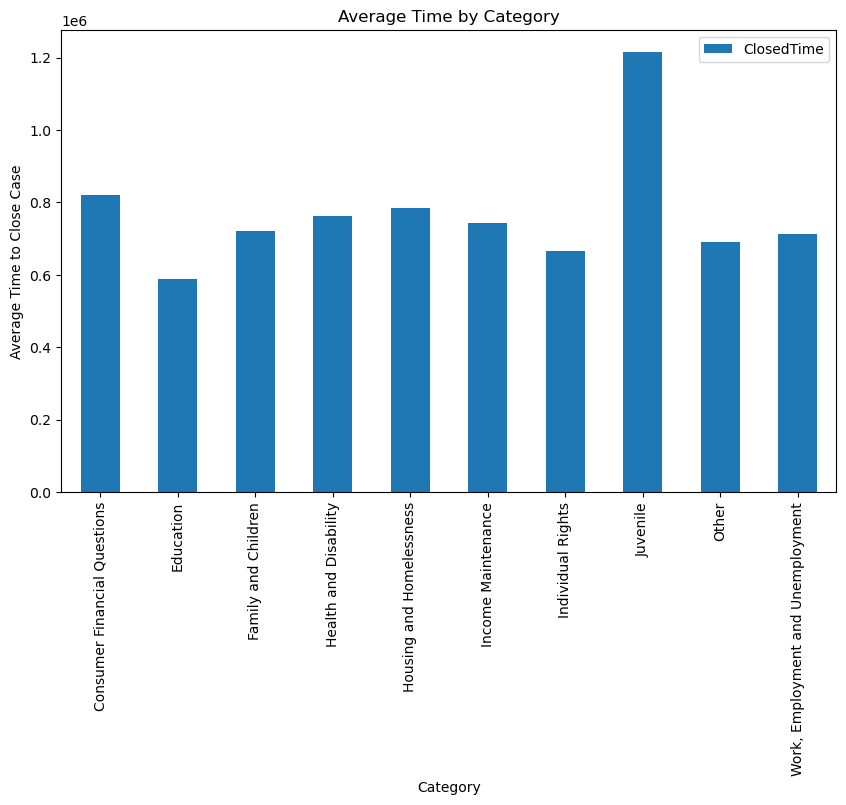

In [96]:
avg_category_time = category_time_sec.groupby(["Category"]).mean().reset_index()

# Pivot the table to have categories as columns
pivot = pd.pivot_table(avg_category_time, index='Category', values='ClosedTime')

# Plot the pivot table
pivot.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Average Time to Close Case')
plt.title('Average Time by Category')

# Show the plot
plt.show()

## Categories by Month

In [132]:
category_questions = pd.merge(questions_imp, categories_imp, on = 'CategoryUno')
category_clients_questions = category_questions.dropna(subset= ['AskedOnUtc', 'TakenOnUtc', 'ClosedOnUtc'])
category_askedtime = category_clients_questions[["Category", "AskedOnUtc"]]
category_askedtime['AskedOnUtc'] = pd.to_datetime(category_askedtime['AskedOnUtc'], errors = 'coerce')
category_askedtime['Month'] = pd.DatetimeIndex(category_askedtime['AskedOnUtc']).month
category_askedtime['Month'] = pd.to_datetime(category_askedtime['Month'], format='%m').dt.month_name()
category_askedtime = category_askedtime.dropna()
category_askedtime.drop("AskedOnUtc", axis=1, inplace=True)
category_askedtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144850 entries, 1 to 202878
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Category  144850 non-null  object
 1   Month     144850 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/2085903474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_askedtime['AskedOnUtc'] = pd.to_datetime(category_askedtime['AskedOnUtc'], errors = 'coerce')
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/2085903474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_askedtime['Month'] = pd.DatetimeIndex(category_askedtime['AskedOnUtc']).month
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/2

In [133]:
category_askedtime['Month'].value_counts()

October      13432
August       13146
July         13009
September    12916
January      12745
June         12057
November     12004
December     11692
May          11481
April        11100
March        10996
February     10272
Name: Month, dtype: int64

<Figure size 2000x1200 with 0 Axes>

<Axes: xlabel='Month', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Category by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Category')

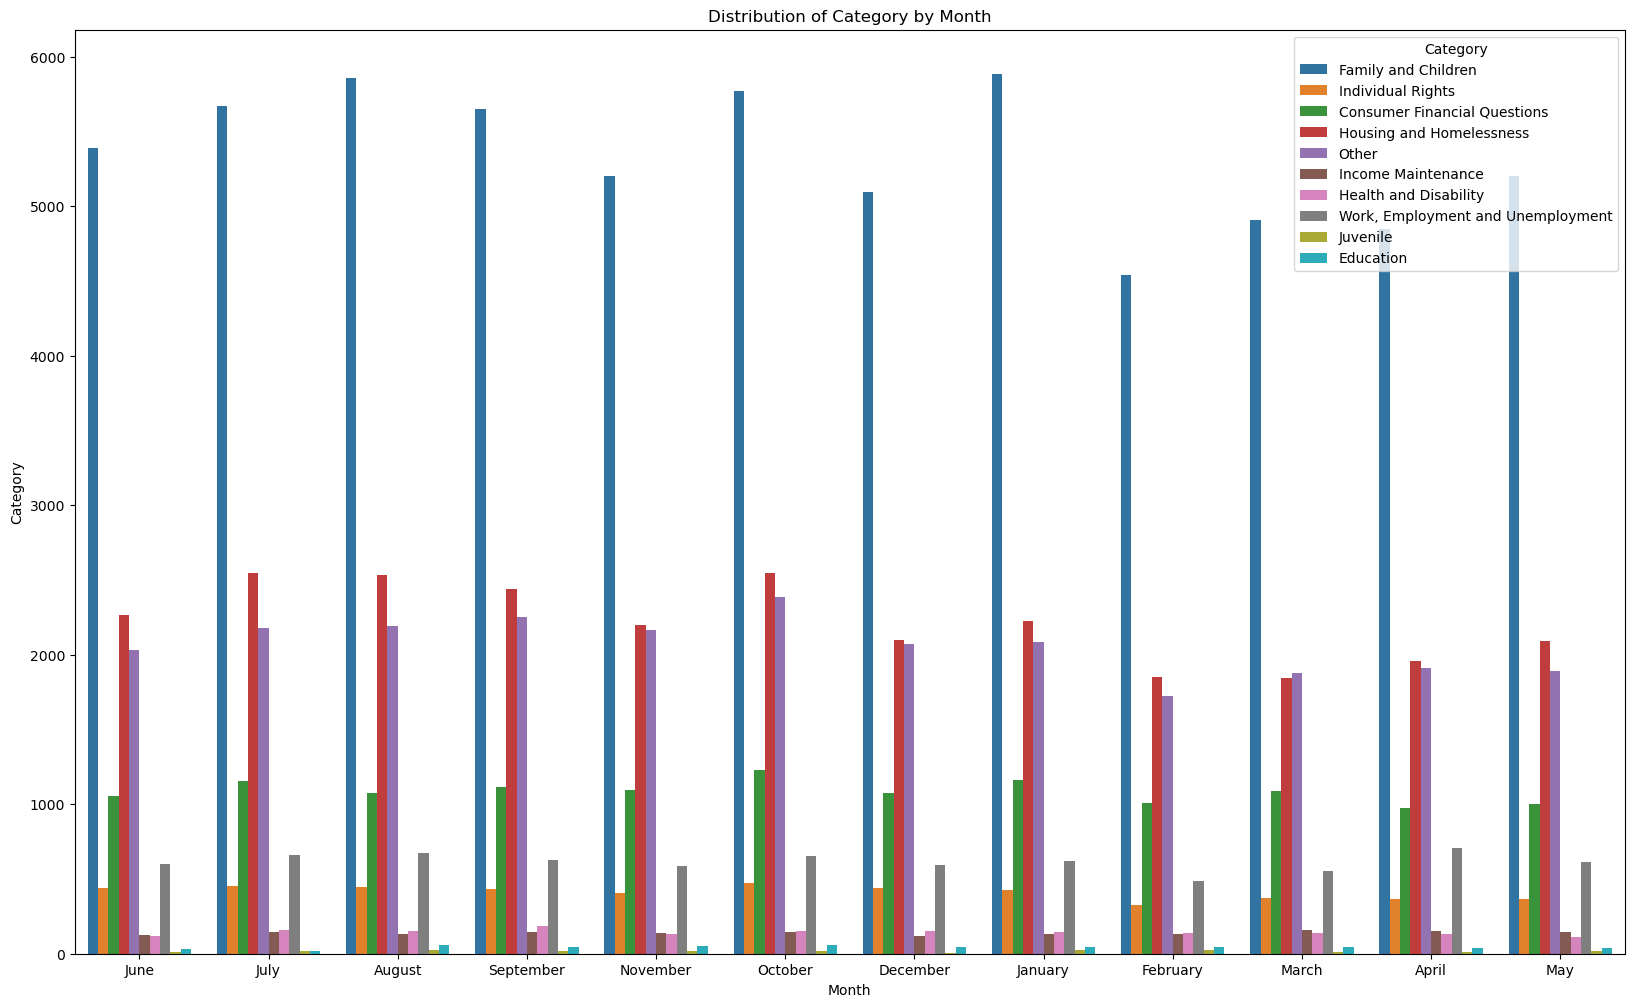

In [137]:
# Create pie chart
plt.figure(figsize=(20,12))
sns.countplot(x="Month", hue="Category", data=category_askedtime)
plt.title("Distribution of Category by Month")
plt.xlabel("Month")
plt.ylabel("Category")
plt.show()

In [144]:
category_questions = pd.merge(questions_imp, categories_imp, on = 'CategoryUno')
category_clients_questions = category_questions.dropna(subset= ['AskedOnUtc', 'TakenOnUtc', 'ClosedOnUtc'])
category_takenontime = category_clients_questions[["Category", "TakenOnUtc"]]
category_takenontime['TakenOnUtc'] = pd.to_datetime(category_takenontime['TakenOnUtc'])
category_takenontime['Month'] = pd.DatetimeIndex(category_takenontime['TakenOnUtc']).month
category_takenontime['Month'] = pd.to_datetime(category_takenontime['Month'], format='%m').dt.month_name()
category_takenontime = category_takenontime.dropna()
category_takenontime.drop("TakenOnUtc", axis=1, inplace=True)
category_takenontime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144850 entries, 1 to 202878
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Category  144850 non-null  object
 1   Month     144850 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/660598830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_takenontime['TakenOnUtc'] = pd.to_datetime(category_takenontime['TakenOnUtc'])
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/660598830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_takenontime['Month'] = pd.DatetimeIndex(category_takenontime['TakenOnUtc']).month
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/660598830.py:6

In [147]:
category_takenontime['Month'].value_counts()

October      14207
December     12957
September    12818
August       12772
July         12631
January      12388
June         11991
November     11724
April        11288
March        11064
May          10912
February     10098
Name: Month, dtype: int64

<Figure size 2000x1200 with 0 Axes>

<Axes: xlabel='Month', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Category by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Category')

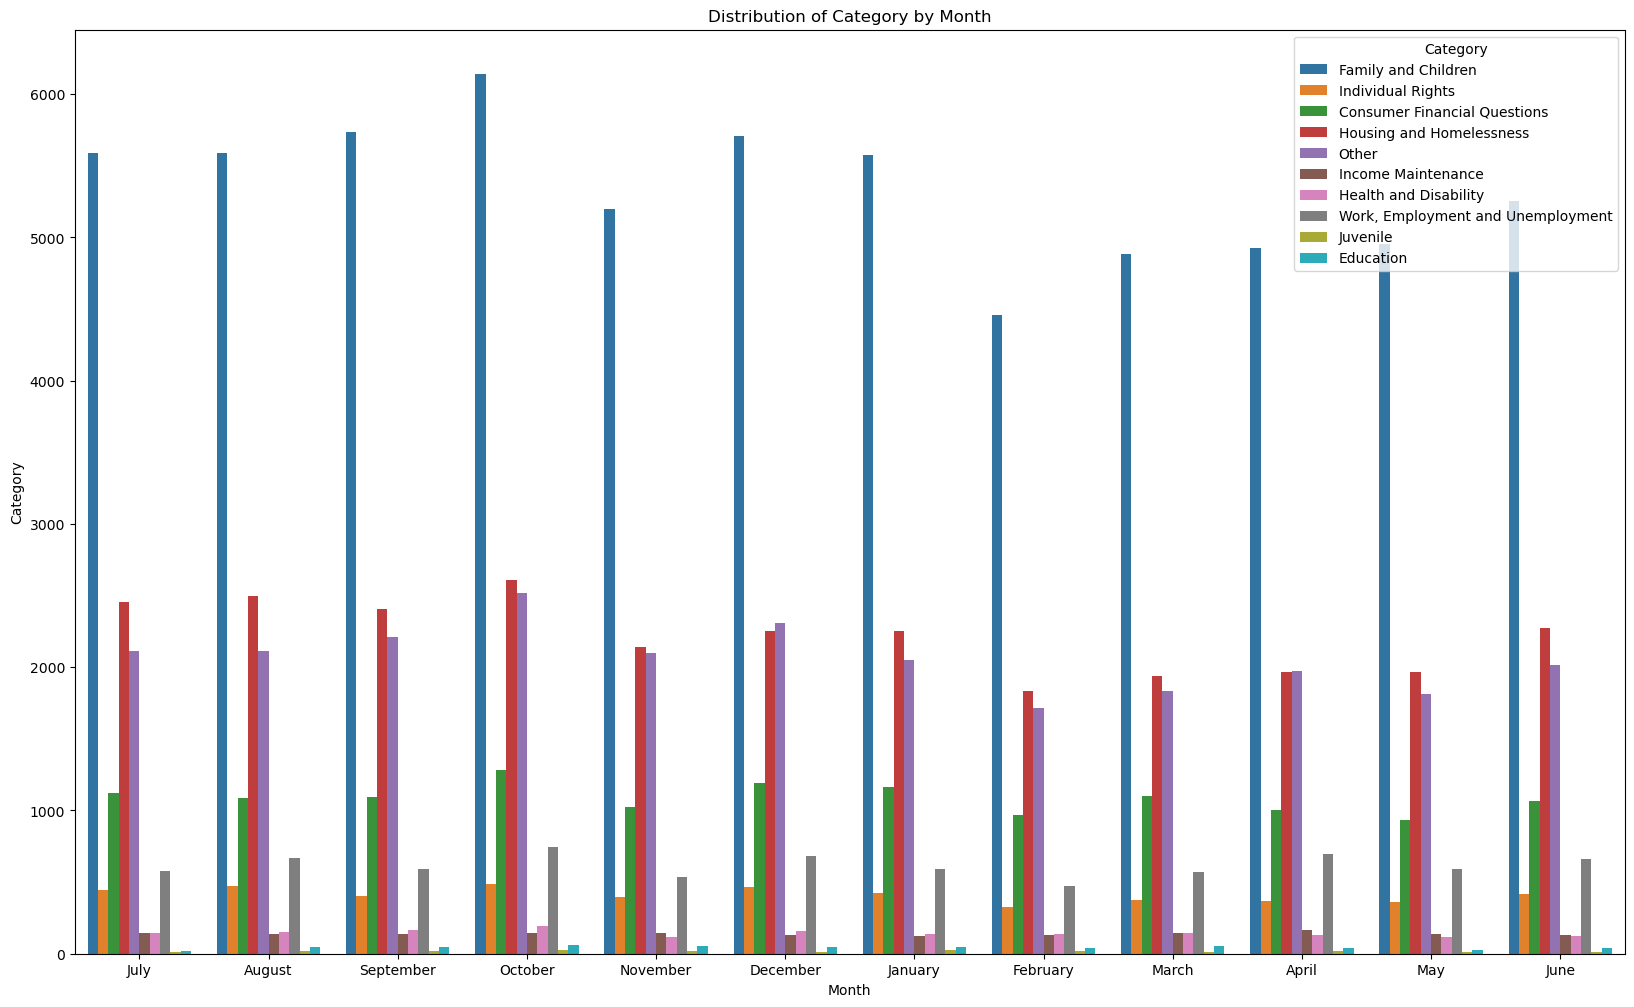

In [148]:
# Create pie chart
plt.figure(figsize=(20,12))
sns.countplot(x="Month", hue="Category", data=category_takenontime)
plt.title("Distribution of Category by Month")
plt.xlabel("Month")
plt.ylabel("Category")
plt.show()

In [174]:
category_questions = pd.merge(questions_imp, categories_imp, on = 'CategoryUno')
category_clients_questions = category_questions.dropna(subset= ['AskedOnUtc', 'TakenOnUtc', 'ClosedOnUtc'])
category_askedtime = category_clients_questions[["Category", "AskedOnUtc"]]
category_askedtime['Category'].value_counts()


Family and Children                  64023
Housing and Homelessness             26591
Other                                24762
Consumer Financial Questions         13036
Work, Employment and Unemployment     7381
Individual Rights                     4940
Health and Disability                 1725
Income Maintenance                    1669
Education                              521
Juvenile                               202
Name: Category, dtype: int64

In [150]:
category_questions.head()

,CategoryUno,ClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline,Category
0,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00,Family and Children
1,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN,Family and Children
2,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,19A1157F-BAF1-437B-84FA-41C5FDF6DE97,2019-06-20 18:11:56,NaN,NaN,NaN,2019-08-13 15:10:26,NaN,Family and Children
3,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,11262CC7-711D-4387-86D7-975C18DBDB96,2019-06-21 17:32:08,3431BD06-C607-4541-934B-3EBAA71BDBBA,2019-07-08 20:00:18,3431BD06-C607-4541-934B-3EBAA71BDBBA,2019-07-17 20:32:49,NaN,Family and Children
4,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,C7BC3B54-9155-4985-AF51-D241610E4AE1,2019-06-22 07:46:44,6A82E739-8D68-4FA7-8651-DC295642324B,2019-07-18 17:32:48,6A82E739-8D68-4FA7-8651-DC295642324B,2019-07-28 17:40:54,NaN,Family and Children


In [151]:
category_questions.dtypes

CategoryUno            object
ClientUno              object
AskedOnUtc             object
TakenByAttorneyUno     object
TakenOnUtc             object
ClosedByAttorneyUno    object
ClosedOnUtc            object
LegalDeadline          object
Category               object
dtype: object

In [156]:
# Using March 15th, 2020 as the time threshold for the covid shutdown
precovid = category_questions[category_questions['AskedOnUtc'] <= '2020-03-15']
precovid.head()

,CategoryUno,ClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline,Category
0,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00,Family and Children
1,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN,Family and Children
2,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,19A1157F-BAF1-437B-84FA-41C5FDF6DE97,2019-06-20 18:11:56,NaN,NaN,NaN,2019-08-13 15:10:26,NaN,Family and Children
3,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,11262CC7-711D-4387-86D7-975C18DBDB96,2019-06-21 17:32:08,3431BD06-C607-4541-934B-3EBAA71BDBBA,2019-07-08 20:00:18,3431BD06-C607-4541-934B-3EBAA71BDBBA,2019-07-17 20:32:49,NaN,Family and Children
4,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,C7BC3B54-9155-4985-AF51-D241610E4AE1,2019-06-22 07:46:44,6A82E739-8D68-4FA7-8651-DC295642324B,2019-07-18 17:32:48,6A82E739-8D68-4FA7-8651-DC295642324B,2019-07-28 17:40:54,NaN,Family and Children


In [157]:
postcovid = category_questions[category_questions['AskedOnUtc'] >'2020-03-15']
postcovid.head()

,CategoryUno,ClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline,Category
469,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,3648F257-0D49-4E4B-9C4F-FD611D9DF967,2020-04-20 16:56:35,B4FA244C-ADAC-48DD-A7FD-6B31FFF32083,2020-04-22 14:56:13,B4FA244C-ADAC-48DD-A7FD-6B31FFF32083,2020-05-01 15:39:02,2020-04-30 00:00:00,Family and Children
485,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,60F92226-F55D-4D50-924B-2A2889440A5F,2020-03-16 20:35:53,E9A122DE-8E31-4E20-AD08-D607F36F3B00,2020-04-08 16:55:03,E9A122DE-8E31-4E20-AD08-D607F36F3B00,2020-04-18 17:18:02,NaN,Family and Children
486,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,4D4EF6CC-8669-4953-A270-FFB0D44C12B1,2020-03-16 20:51:45,FA34142B-1575-4720-981C-2D28C3560137,2020-03-16 21:02:03,FA34142B-1575-4720-981C-2D28C3560137,2020-03-19 21:35:51,NaN,Family and Children
487,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,F1227A3D-7668-432D-A48D-4D8FA84CB543,2020-03-23 22:39:52,FA34142B-1575-4720-981C-2D28C3560137,2020-03-23 23:59:40,FA34142B-1575-4720-981C-2D28C3560137,2020-03-24 02:52:32,NaN,Family and Children
488,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,0E04F420-5901-4FF8-AE32-8D1CCF3B77DD,2020-03-24 15:02:58,FA34142B-1575-4720-981C-2D28C3560137,2020-03-24 18:13:23,FA34142B-1575-4720-981C-2D28C3560137,2020-03-29 20:32:45,NaN,Family and Children


<Axes: >

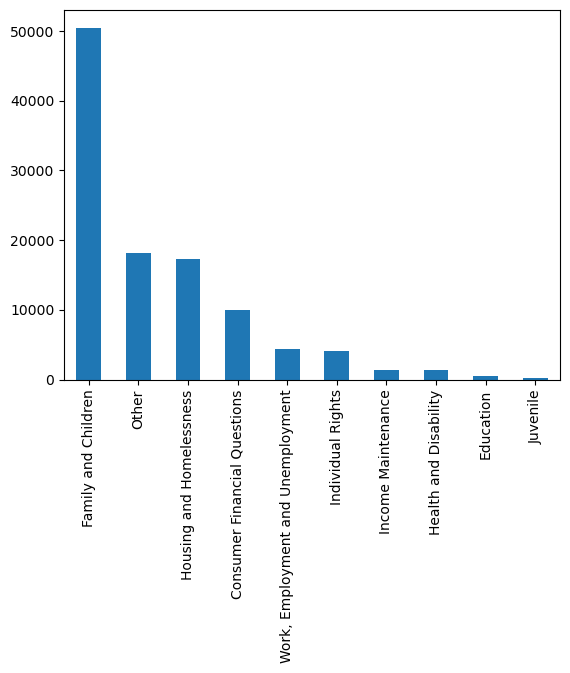

In [160]:
precovid['Category'].value_counts().plot(kind='bar')
plt.show()

<Axes: >

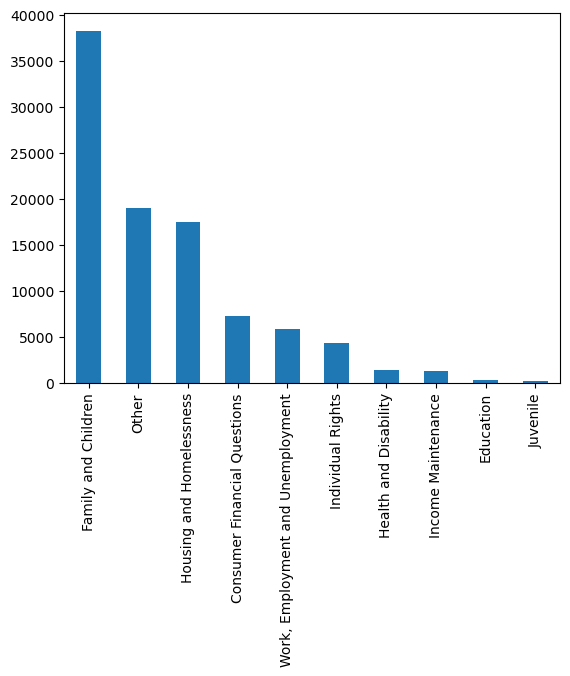

In [161]:
postcovid['Category'].value_counts().plot(kind='bar')
plt.show()

In [172]:
category_askedtime['Category'].value_counts()

Family and Children                  64023
Housing and Homelessness             26591
Other                                24762
Consumer Financial Questions         13036
Work, Employment and Unemployment     7381
Individual Rights                     4940
Health and Disability                 1725
Income Maintenance                    1669
Education                              521
Juvenile                               202
Name: Category, dtype: int64

In [173]:
category_askedtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144850 entries, 1 to 202878
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Category    144850 non-null  object
 1   AskedOnUtc  144850 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [186]:
import pandas as pd
from prophet import Prophet
from fredapi import Fred
import matplotlib.pyplot as plt

# Step 2: Load the data
fred_api_key = '7863d3174c97537490ad0a07a3938235'
fred = Fred(api_key=fred_api_key)
unemployment_data = pd.DataFrame(fred.get_series('UNRATE'))

# Step 3: Prepare the data for analysis
unemployment_data.reset_index(inplace=True)
unemployment_data.columns = ['ds', 'y']
unemployment_data['ds'] = pd.to_datetime(unemployment_data['ds'])

# Filter legal cases by category (e.g., 'category_1')
unemployment_askedtime = category_askedtime[category_askedtime['Category'] == "Work, Employment and Unemployment"]
unemployment_askedtime['AskedOnUtc'] = pd.to_datetime(unemployment_askedtime['AskedOnUtc'])
unemployment_askedtime['AskedOnUtc'] = unemployment_askedtime['AskedOnUtc'].dt.date

# Aggregate legal cases by date
agg_legal_cases = unemployment_askedtime.groupby('AskedOnUtc').size().reset_index()
agg_legal_cases.columns = ['ds', 'y']
agg_legal_cases['ds'] = pd.to_datetime(agg_legal_cases['ds'])

# Merge the datasets
merged_data = pd.merge(agg_legal_cases, unemployment_data, on='ds', suffixes=('_legal_cases', '_unemployment'))
merged_data.head()

/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/4124203609.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_askedtime['AskedOnUtc'] = pd.to_datetime(unemployment_askedtime['AskedOnUtc'])
/var/folders/v6/fgzs66493pj5k16rq0vlgvq00000gp/T/ipykernel_42226/4124203609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_askedtime['AskedOnUtc'] = unemployment_askedtime['AskedOnUtc'].dt.date


,ds,y_legal_cases,y_unemployment
0,2016-02-01,1,4.9
1,2016-06-01,1,4.9
2,2016-07-01,2,4.8
3,2016-09-01,1,5.0
4,2016-12-01,1,4.7


"\n# Step 4: Train and fit the model\nmodel = Prophet()\nmodel.fit(merged_data[['ds', 'y_legal_cases']])\n\n# Step 5: Make predictions\nfuture = model.make_future_dataframe(periods=12, freq='M')\nforecast = model.predict(future)\n"

Text(0, 0.5, "Fred's Unemployment Rate")

Text(0, 0.5, 'Legal Cases Count')

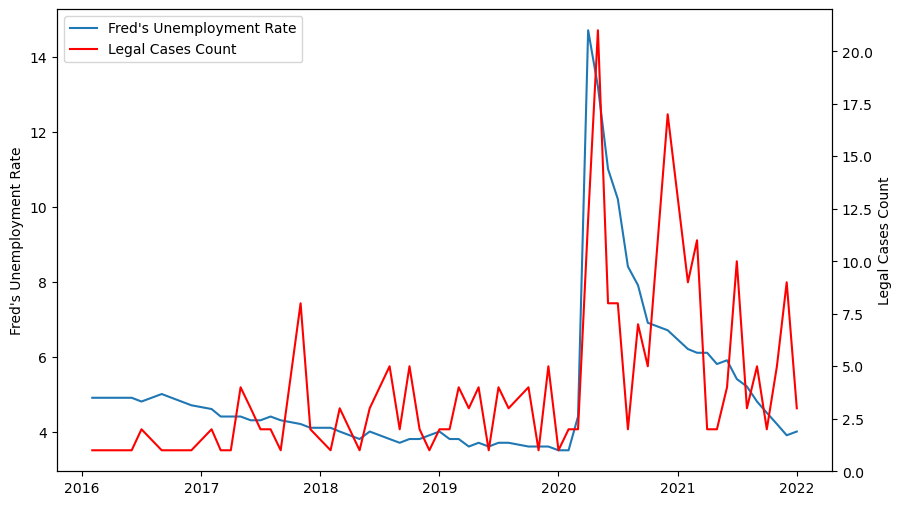

In [187]:
'''
# Step 4: Train and fit the model
model = Prophet()
model.fit(merged_data[['ds', 'y_legal_cases']])

# Step 5: Make predictions
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
'''

# Step 6: Visualize the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(merged_data['ds'], merged_data['y_unemployment'], label="Fred's Unemployment Rate")
ax.set_ylabel("Fred's Unemployment Rate")
ax_twin = ax.twinx()
ax_twin.plot(merged_data['ds'], merged_data['y_legal_cases'], color='r', label='Legal Cases Count')
ax_twin.set_ylabel('Legal Cases Count')

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_twin.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc=0)

plt.show()

In [189]:
import numpy as np

# create a correlation matrix
corr_matrix = np.corrcoef(merged_data['y_unemployment'], merged_data['y_legal_cases'])

# extract the correlation coefficient
corr_coefficient = corr_matrix[0, 1]
print(corr_coefficient)

0.6584192287749371
